## Name - Dewansh Singh
## Roll No. - 037
## Seat No. - T214102
## PRN - 0120190462
## School - SCET



# Logistic Regression with Python

We'll be trying to predict a classification- survival(1) or deceased(0).<br>
Here we will be implementing Logistic Regression in Python for classification of given dataset to predict the survived people of the Titanic incident.<br>

We'll use a "semi-cleaned" version of the titanic data set, and we'll perform cleaning methods to get cleaned dataset for the prediction.

## Things done in this Project
-> Data Reading<br>
-> Statistical Methods<br>
-> Data Visualization (Exploring Data Analysis)<br>
-> Used Cufflinks for the data<br>
-> Data Cleaning <br>
-> Converting Categorical Features<br>
-> Building the Logistic Regression Model<br>
    a. Train Test Split<br>
    b. Cross Validation<br>
    c. Training the model and Predicting using the Testing Data<br>
    d. Evaluation using Classification Report<br>
    e. Introducing Confusion Matrix<br>
    f. AUC-ROC Curve<br>
    g. Checking Accuracy<br>
-> Comparison with other Supervised Learning Algorithm<br>
    a. KNN Algorithm<br>
    b. Random Forest Algorithm<br>
    c. Logistic Regression<br>
    d. Decision Tree<br>
    e. Stochastic Gradient Descent<br>

## Import Libraries
Let's import some libraries to get started!

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the *titanic_train.csv* file into a pandas dataframe.

In [156]:
train = pd.read_csv('titanic_train.csv')

In [157]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Embarked implies where the traveler mounted from. There are three possible values for Embark — *Southampton(S), Cherbourg(C), and Queenstown(Q). More than 70% of the people boarded from Southampton.*

## Statistical Methods 

In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
train.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


# Exploratory Data Analysis

Exploratory Data Analysis is one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, etc.

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

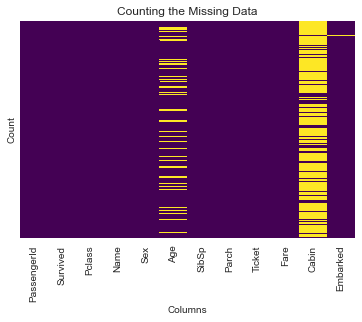

In [162]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Counting the Missing Data')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.savefig('Missing Data')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this column instead of dealing with it.<br>

Now we are going to use the *Feature Engineering methods* like Data Visualisation, Cleaning, etc.

Text(0.5, 1.0, 'Counting the Survived People')

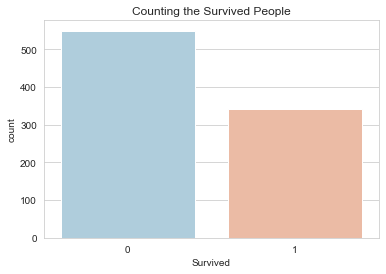

In [163]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')
plt.title('Counting the Survived People')

Text(0.5, 1.0, 'Counting the Survived People according to Gender')

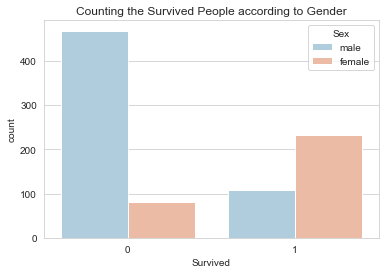

In [164]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.title('Counting the Survived People according to Gender')

Text(0.5, 1.0, 'Counting the Survived People according to PersonClass (Pclass)')

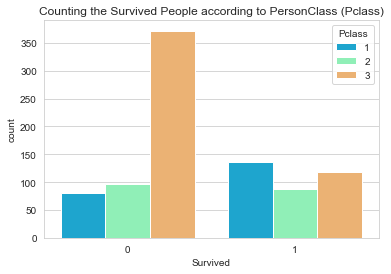

In [165]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.title('Counting the Survived People according to PersonClass (Pclass)')

Text(0.5, 1.0, 'Counting the People according to Age')

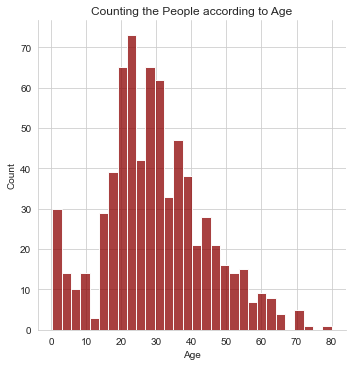

In [166]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.title('Counting the People according to Age')

Text(0.5, 1.0, 'Counting the People according to Age with Transperancy')

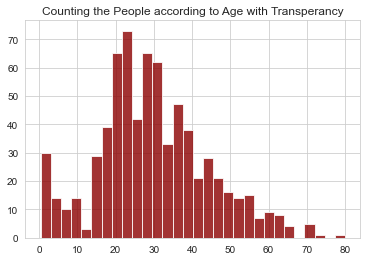

In [168]:
train['Age'].hist(bins=30,color='darkred',alpha=0.8)
plt.title('Counting the People according to Age with Transperancy')

Text(0.5, 1.0, 'Counting the Siblings of People')

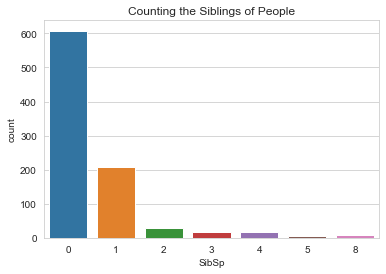

In [169]:
sns.countplot(x='SibSp',data=train)
plt.title('Counting the Siblings of People')

Text(0, 0.5, 'Fare in thousands')

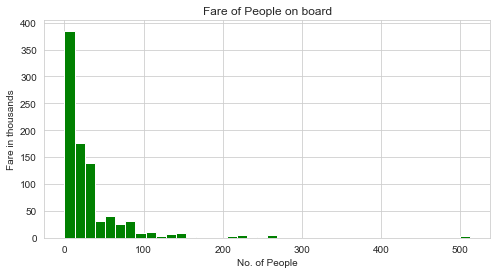

In [170]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.title('Fare of People on board')
plt.xlabel('No. of People')
plt.ylabel('Fare in thousands')

<AxesSubplot:>

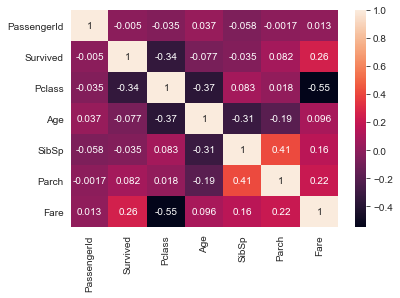

In [171]:
sns.heatmap(train.corr(), annot= True)


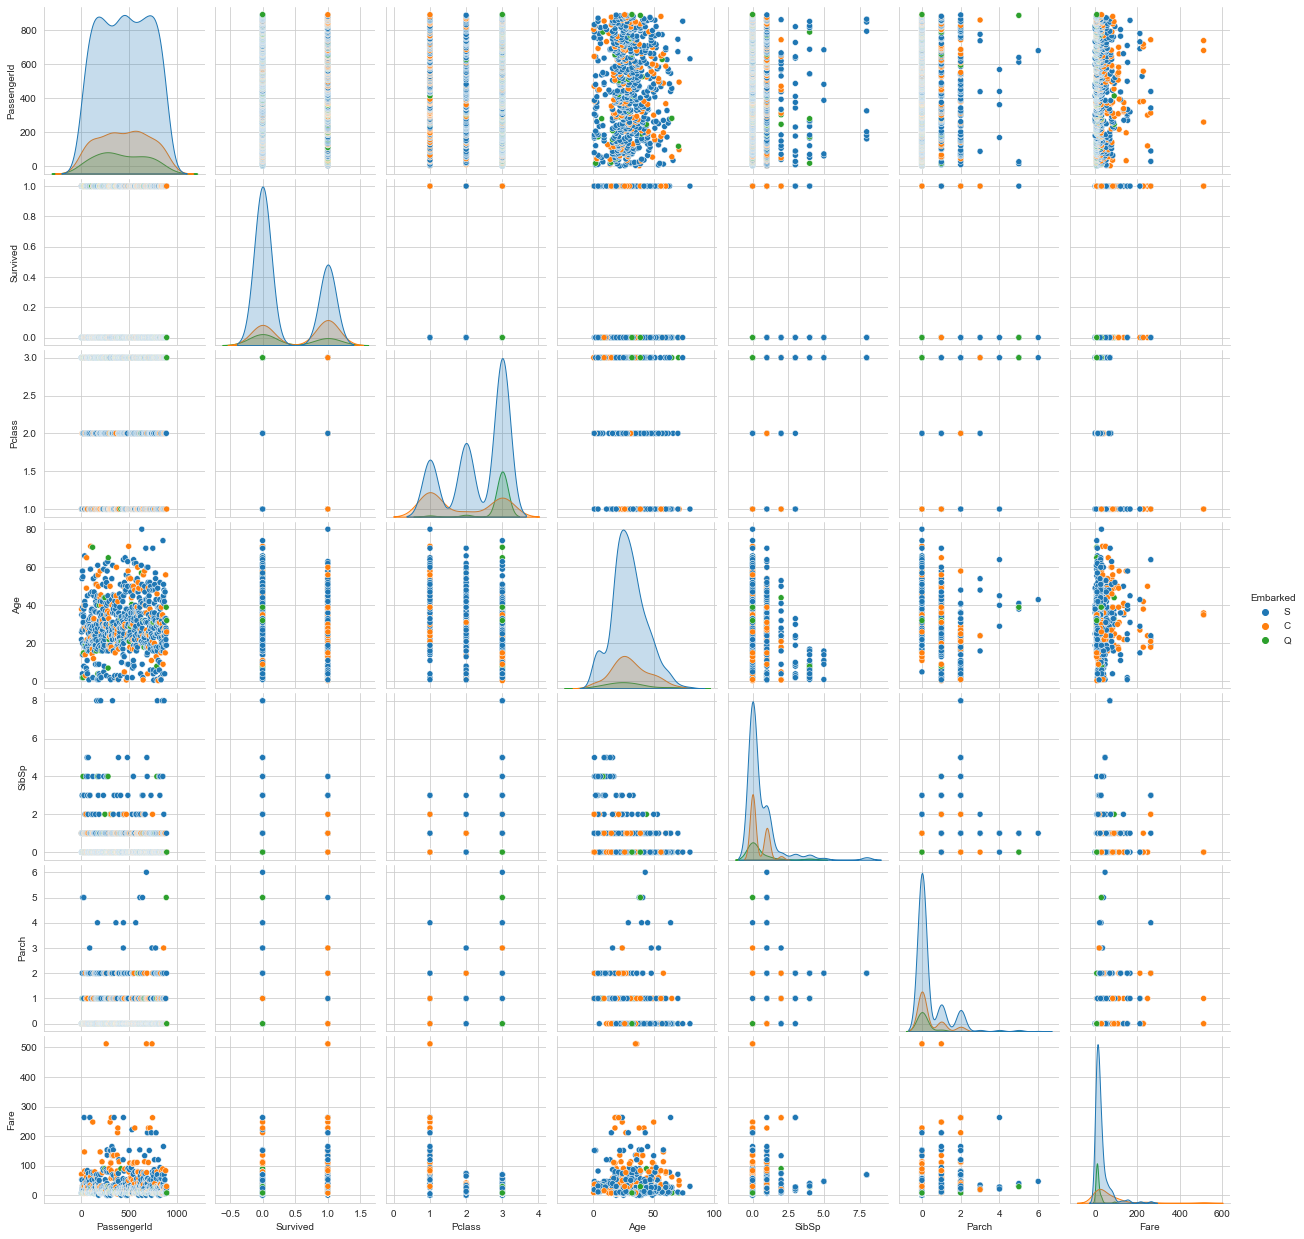

In [122]:
sns.pairplot(train, hue='Embarked', height=2.5)

### Cufflinks for plots

Cufflink is also a python library that connects plotly with pandas so that we can create charts directly on data frames.

In [123]:
import cufflinks as cf
cf.go_offline()

In [152]:
train['Fare'].iplot(kind='hist',bins=30,color='green')


___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

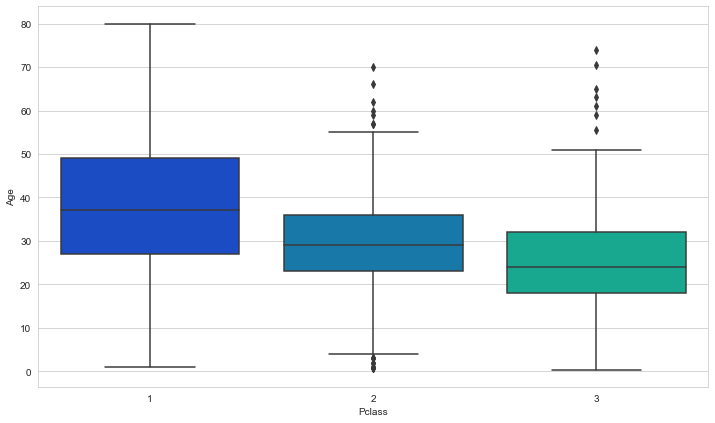

In [125]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the whether passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.<br>

Basically we are fighting with the *Outlier's of the data* in the form of Age.

In [126]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [127]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

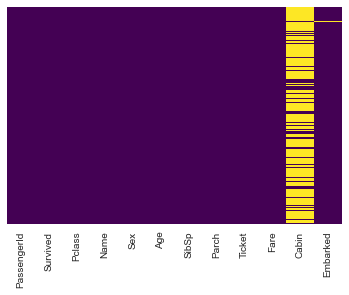

In [128]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [129]:
train.drop('Cabin',axis=1,inplace=True)

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [131]:
train.dropna(inplace=True)

<AxesSubplot:>

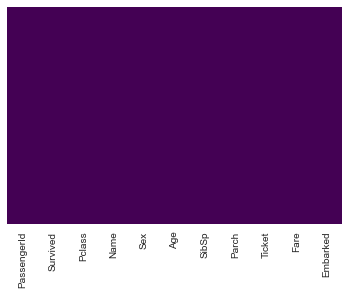

In [132]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

_Perfect.....Now there is no Missing data or Hinderence in the dataset_

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [134]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [135]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [136]:
train = pd.concat([train,sex,embark],axis=1)

In [137]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.<br>

Here I am using *Binary or Binomial Logistic Regression Algorithm*. In such a kind of classification, a dependent variable will have only two possible types either 1 and 0.<br> 

Here I am using the sklearn library of Logistic Regression to predict the model, so we don't need to do internal calculation.<br>

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Cross Validation

-> Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction.<br>

-> K-Fold Cross Validation<br>
    In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.<br>
    
-> Let's cross validate the training and testing dataset.

In [140]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(solver='lbfgs', max_iter= 1000000)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

10-fold cross validation average accuracy: 0.79


## Training and Predicting

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [142]:
logmodel = LogisticRegression(solver='lbfgs', max_iter= 1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [143]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

### Compute precision, recall, F-measure and support

The _accuracy_ is the ratio *tp + tn = (tp + tn + fp + fn)*<br> 

The _precision_ is the ratio *tp / (tp + fp)* where *tp is the number of true positives* and *fp the number of false positives*. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br>

The _recall_ is the ratio *tp / (tp + fn)* where *tp is the number of true positives* and *fn the number of false negatives*. The recall is intuitively the ability of the classifier to find all the positive samples.<br>

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.<br>

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.<br>

*The support is the number of occurrences of each class in y_test.*

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



Not so bad! Our Model Precision is about 83% on an average. Hope you like my model and it's prediction!!


In [146]:
from sklearn.metrics import confusion_matrix


In [147]:
confusion_matrix = confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[149  14]
 [ 33  71]]


Not so bad! Our Model Precision is showing that (149+71) is the correct predictions we made and (33+14) is the incorrect predictions we made.

## AUC-ROC Curve

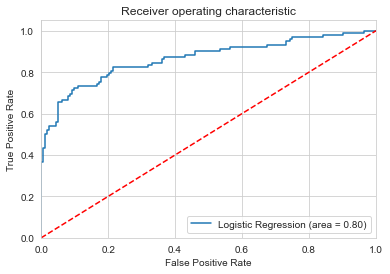

In [148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Checking Accuracy of Model

In [149]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


## Comparison with other Supervised Learning Algorithm

### KNN Algorithm

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

### Random Forest Algorithm

In [181]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

### Logistic Regression

In [182]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

### Decision Tree 

In [183]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

### Stochastic Gradient Descent (SGD)

In [184]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

## Getting Results in Tabular Format

In [190]:
results = pd.DataFrame({
    'Algorithms': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score in %': [acc_knn, acc_log, 
              acc_random_forest, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score in %', ascending=False)
result_df = result_df.set_index('Score in %')
result_df.head(7)

,Algorithms
Score in %,
100.00,Random Forest
100.00,Decision Tree
80.71,KNN
80.39,Logistic Regression
63.02,Stochastic Gradient Decent


Clearly we can observe that _Random Forest and Decision Tree_ are the best suited supervised algorithm for predicting the model.